# !pip install pysentimiento==0.7.2

In [86]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")


In [87]:
analyzer.predict("Qué olor a mandarina")

AnalyzerOutput(output=NEG, probas={NEG: 0.740, NEU: 0.174, POS: 0.087})

In [54]:
#Hate Speech(amnistia)

hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

In [8]:
hate_speech_analyzer.predict('sido actor extraordinario haciendo creer haciendo flirteando daba cuenta cosa dicho descend debe reina debe mismo nacer reina consort nunca quieren')

AnalyzerOutput(output=[], probas={hateful: 0.025, targeted: 0.010, aggressive: 0.014})

In [9]:
analyzer.predict('sido actor extraordinario haciendo creer haciendo flirteando daba cuenta cosa dicho descend debe reina debe mismo nacer reina consort nunca quieren')

AnalyzerOutput(output=NEU, probas={NEU: 0.713, NEG: 0.241, POS: 0.046})

In [88]:
import pandas as pd
df = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_amnistia_procesado.csv')

In [7]:
df['comment_stem'][0]

'creo importemo misma opini'

In [8]:
def asignar_valor(elemento):
    if isinstance(elemento, str):
        resultado = analyzer.predict(elemento)
        if resultado.output == 'NEG':
            return -1
        elif resultado.output == 'NEU':
            return 0
        elif resultado.output == 'POS':
            return 1
        else:
            print(f"Output de sentimiento desconocido: {resultado.output}")
            return None  # Manejar otros casos si es necesario

# Aplicar la función a la columna 'comment_stem' y crear una nueva columna 'valor_asignado'
df['sentiment'] = df['comment_stem'].apply(lambda x: asignar_valor(x))

# Mostrar el DataFrame con la nueva columna


In [36]:
df.head()

,Unnamed: 0,video_id,author,comment,comment_stem,vectores_tfidf
0,0,T-smnnEAdM0,UCTlJjNviHj7Y32eiOdHH_FQ,No me creo que les importemos algo. Estos son ...,creo importemo misma opini,[0. 0. 0. ... 0. 0. 0.]
1,1,T-smnnEAdM0,UC6o_ckmEk87f7TiViatW11w,No a la ANMISTIA y no AL PERDONA LA DEUDA DE C...,anmistia perdona deuda catalu sirv separatista...,[0. 0. 0. ... 0. 0. 0.]
2,2,T-smnnEAdM0,UCCXQ_BAzI-GcXgDUwN4XiXQ,"Que no te enteras,Contreras\nQue se la trae fl...",entera contrera trae floja asunto interno espa...,[0. 0. 0. ... 0. 0. 0.]
3,3,T-smnnEAdM0,UCB4dg7xkDRLpW561xlwNnyw,"¿Como puede ser impecable?, si hasta hace poco...",pued impec hace bocachancla palanganero felon ...,[0. 0. 0. ... 0. 0. 0.]
4,4,T-smnnEAdM0,UCFc7zfxN235QsmGBJ-GsUcA,Osea que cuando gobierna el PP nos roba y mete...,osea gobierna roba mete guerra aqui pasa gobie...,[0. 0. 0. ... 0. 0. 0.]


In [10]:
df['sentiment'].value_counts()

-1.0    5595
 0.0    5199
 1.0     809
Name: sentiment, dtype: int64

In [11]:
df[df['sentiment']==-1]

,Unnamed: 0,video_id,author,comment,comment_stem,vectores_tfidf,sentiment
1,1,T-smnnEAdM0,UC6o_ckmEk87f7TiViatW11w,No a la ANMISTIA y no AL PERDONA LA DEUDA DE C...,anmistia perdona deuda catalu sirv separatista...,[0. 0. 0. ... 0. 0. 0.],-1.0
2,2,T-smnnEAdM0,UCCXQ_BAzI-GcXgDUwN4XiXQ,"Que no te enteras,Contreras\nQue se la trae fl...",entera contrera trae floja asunto interno espa...,[0. 0. 0. ... 0. 0. 0.],-1.0
3,3,T-smnnEAdM0,UCB4dg7xkDRLpW561xlwNnyw,"¿Como puede ser impecable?, si hasta hace poco...",pued impec hace bocachancla palanganero felon ...,[0. 0. 0. ... 0. 0. 0.],-1.0
4,4,T-smnnEAdM0,UCFc7zfxN235QsmGBJ-GsUcA,Osea que cuando gobierna el PP nos roba y mete...,osea gobierna roba mete guerra aqui pasa gobie...,[0. 0. 0. ... 0. 0. 0.],-1.0
6,6,T-smnnEAdM0,UC_BfqtBXYac3FDWJN72Sd_g,Europa SOS\nSánchez= Maduro,europa nchez maduro,[0. 0. 0. ... 0. 0. 0.],-1.0
...,...,...,...,...,...,...,...
11902,11902,UCypRjGGvik,UCpkUmGJrC6kn_0r1AZ3I5cA,"Araujo te equivocas , tiren de hemeroteca para...",araujo equivoca tiren hemeroteca recordarl dijo,[0. 0. 0. ... 0. 0. 0.],-1.0
11903,11903,UCypRjGGvik,UC9Bf43fR7XaU5kx6cL9TQzQ,Bermejo tú siempre has sido lo mismo un Comuni...,bermejo siempr sido mismo comunista agazapado ...,[0. 0. 0. ... 0. 0. 0.],-1.0
11905,11905,UCypRjGGvik,UCyK_y121VHJG3boqeWcmukg,"Si señora, una nube de humo para tapar el golp...",nube humo tapar golp totalment sanchez sabe ju...,[0. 0. 0. ... 0. 0. 0.],-1.0
11906,11906,UCypRjGGvik,UCyK_y121VHJG3boqeWcmukg,Pero fijaros que no enseñan todo esa informaci...,fijaro ens informaci pegaso misma banda enfang...,[0. 0. 0. ... 0. 0. 0.],-1.0


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
def show_wordcloud(df, column_name):
    all_words = df[column_name].tolist()
    all_words_str = ' '.join([str(x) for x in all_words if str(x).lower()]) 

    # Define la fuente TrueType que quieres usar (asegúrate de que sea compatible)
    font_path = 'arial.ttf'
    
    # Resto de tu código para procesar el texto y generar la WordCloud...
    wordcloud = WordCloud(
        width=2000,
        height=1000,
        random_state=1,
        background_color='black',
        colormap='viridis',
        #font_path=font_path
    ).generate(all_words_str)
    
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

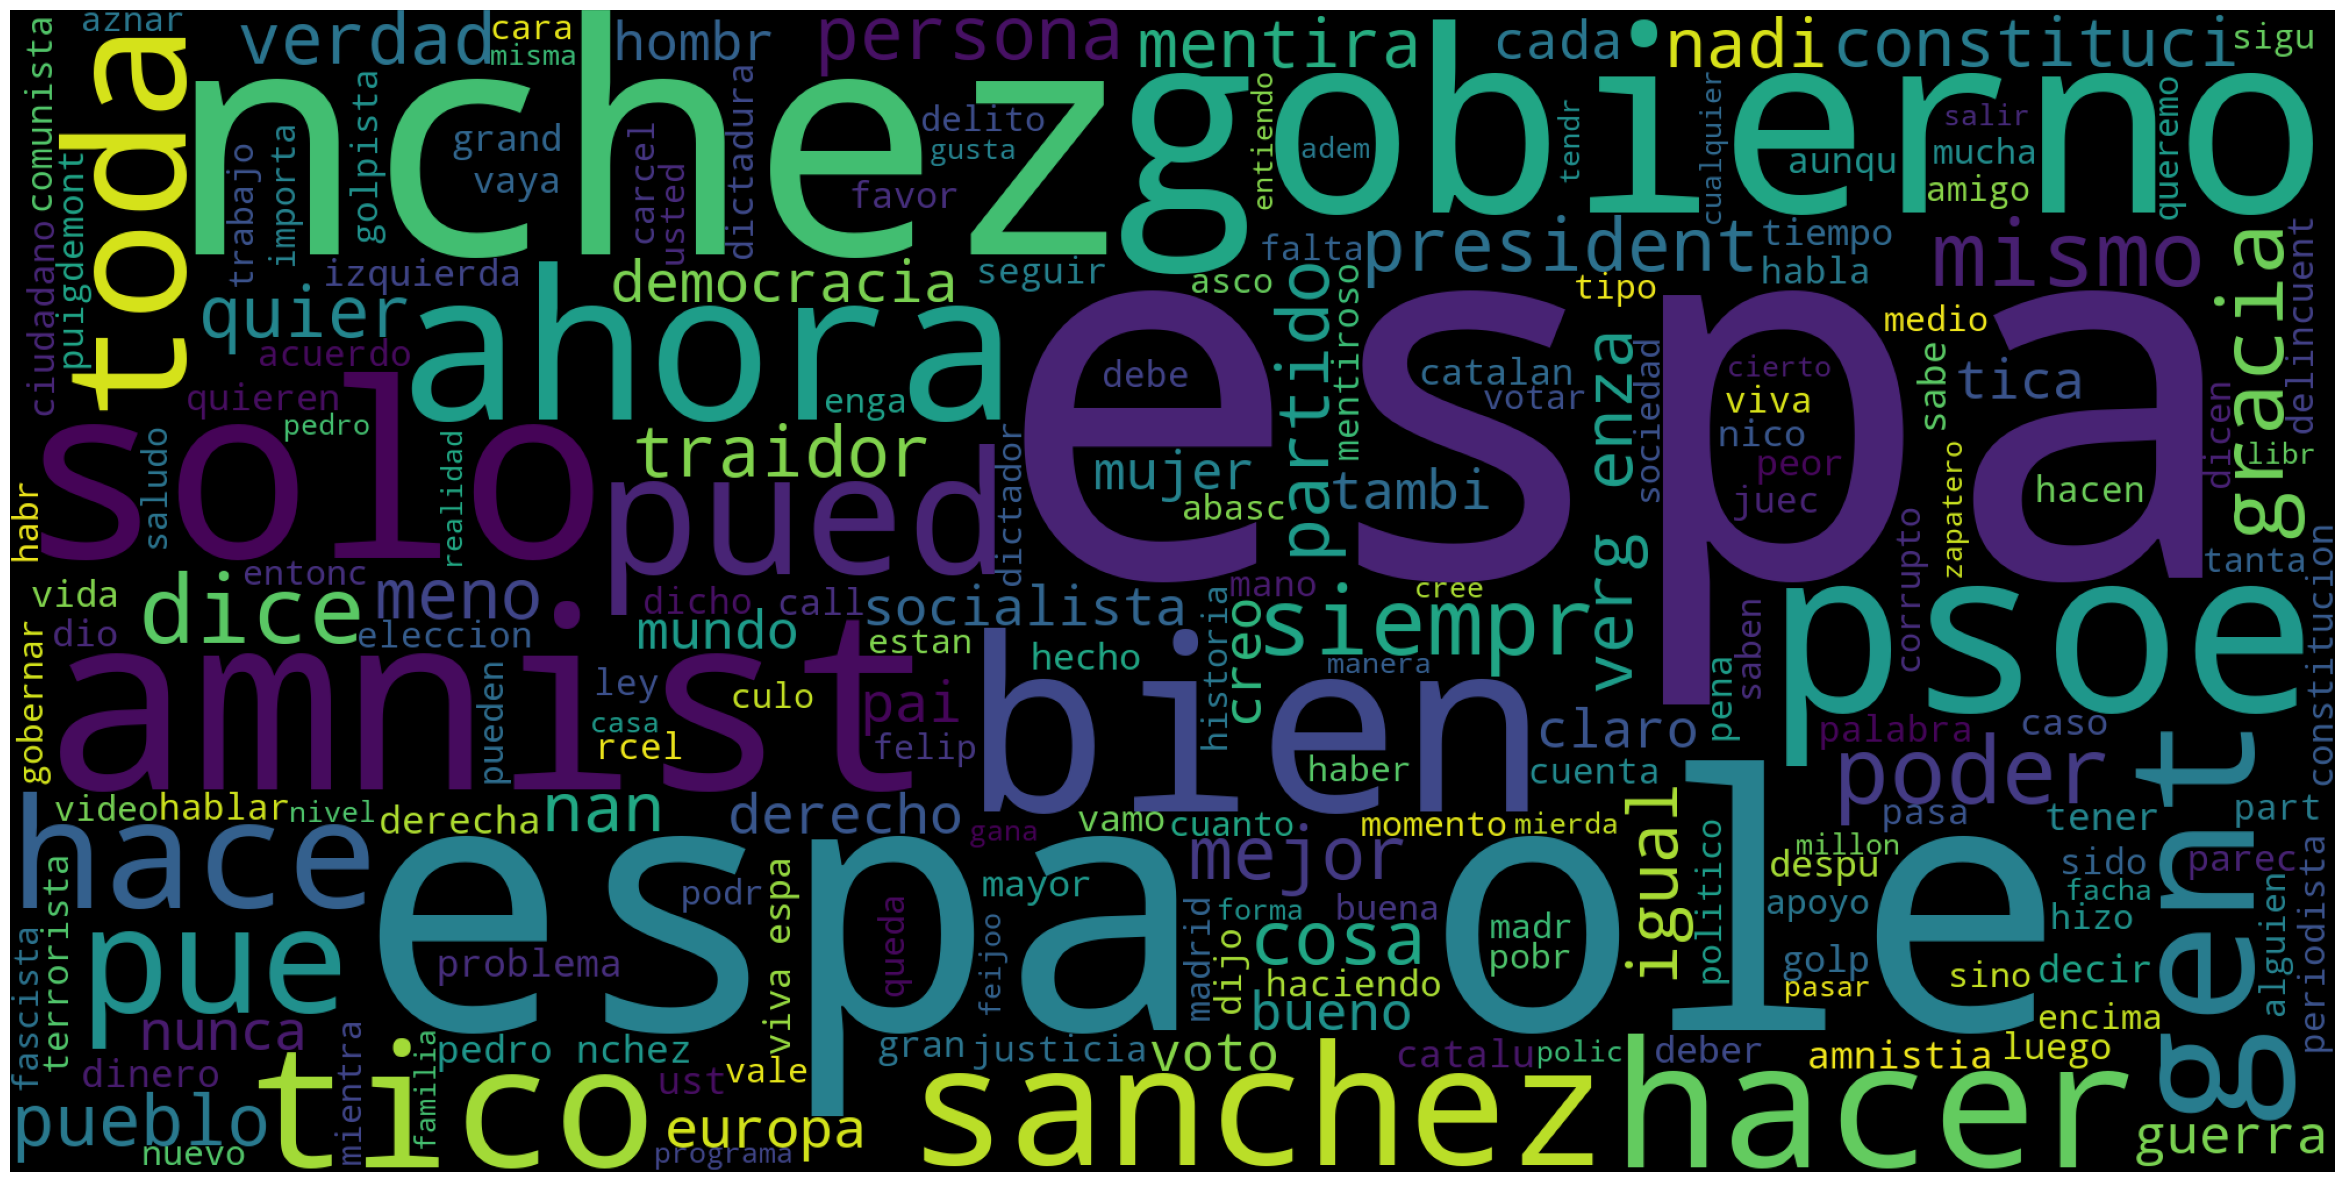

In [14]:
show_wordcloud(df,'comment_stem')

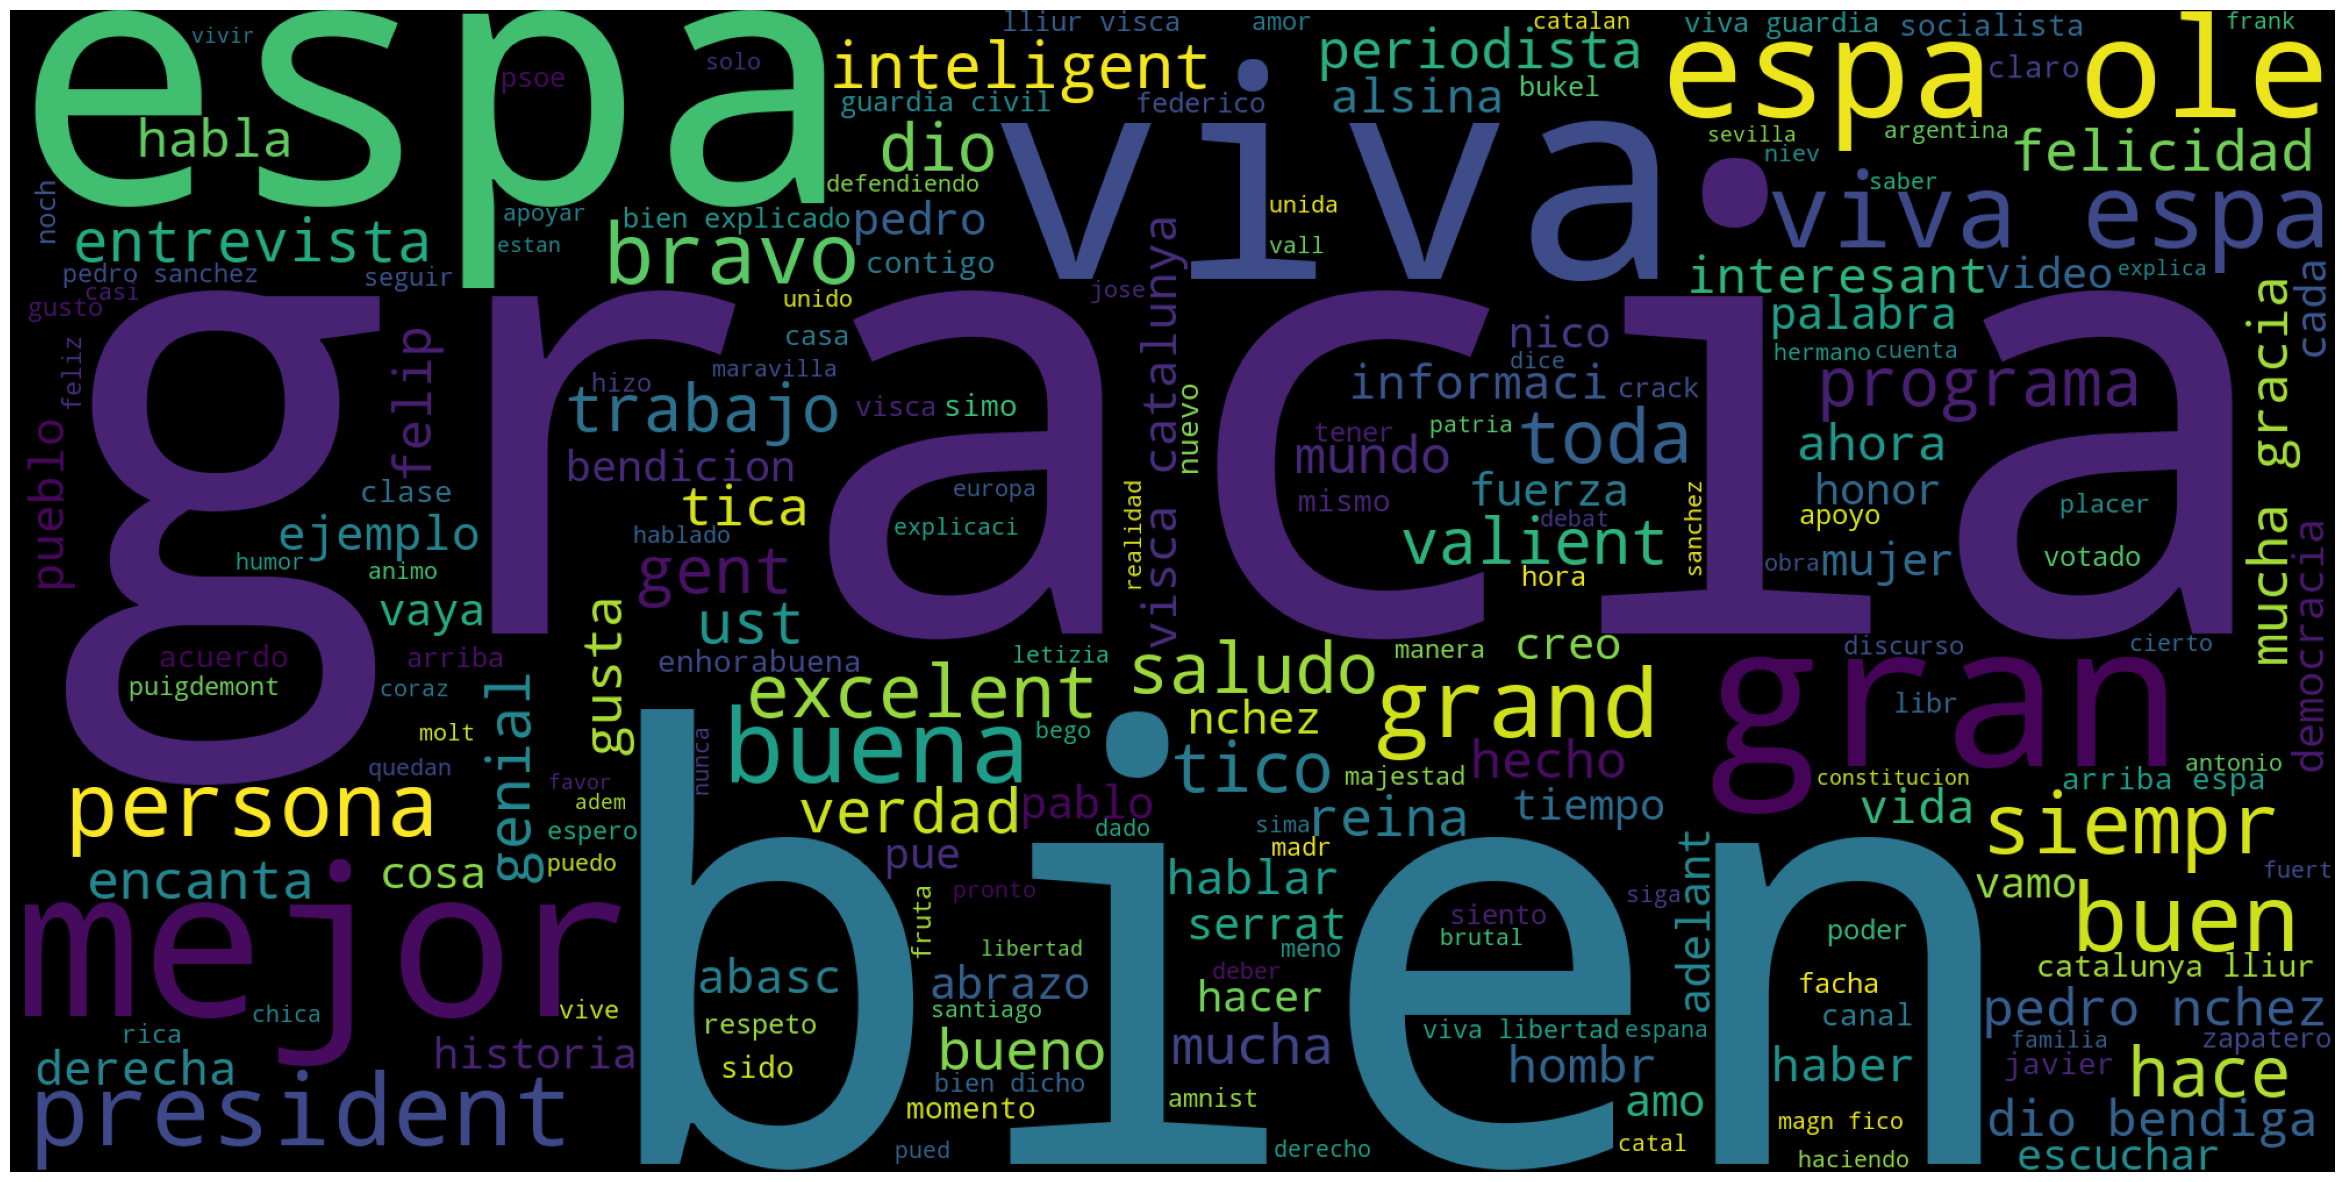

In [15]:
show_wordcloud(df[df['sentiment'] == 1], 'comment_stem')

In [16]:
df.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_amnistia_sentimiento.csv')

In [17]:
# Filtrar las filas donde 'sentiment' es igual a -1
df_neg = df[df['sentiment'] == -1]

# Seleccionar las columnas específicas que quieres conservar en el nuevo dataset
columnas_deseadas = ['video_id', 'author', 'comment', 'vectores_tfidf', 'comment_stem', 'sentiment']
df_neg = df_neg[columnas_deseadas].copy()

df_neg.head()

,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
1,T-smnnEAdM0,UC6o_ckmEk87f7TiViatW11w,No a la ANMISTIA y no AL PERDONA LA DEUDA DE C...,[0. 0. 0. ... 0. 0. 0.],anmistia perdona deuda catalu sirv separatista...,-1.0
2,T-smnnEAdM0,UCCXQ_BAzI-GcXgDUwN4XiXQ,"Que no te enteras,Contreras\nQue se la trae fl...",[0. 0. 0. ... 0. 0. 0.],entera contrera trae floja asunto interno espa...,-1.0
3,T-smnnEAdM0,UCB4dg7xkDRLpW561xlwNnyw,"¿Como puede ser impecable?, si hasta hace poco...",[0. 0. 0. ... 0. 0. 0.],pued impec hace bocachancla palanganero felon ...,-1.0
4,T-smnnEAdM0,UCFc7zfxN235QsmGBJ-GsUcA,Osea que cuando gobierna el PP nos roba y mete...,[0. 0. 0. ... 0. 0. 0.],osea gobierna roba mete guerra aqui pasa gobie...,-1.0
6,T-smnnEAdM0,UC_BfqtBXYac3FDWJN72Sd_g,Europa SOS\nSánchez= Maduro,[0. 0. 0. ... 0. 0. 0.],europa nchez maduro,-1.0


In [18]:
df_neg.shape

(5595, 6)

In [19]:
df_neg.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_amnistia_negativo.csv')

In [20]:
import pandas as pd

In [21]:
df_neg = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_amnistia_negativo.csv')

In [22]:
df_neg.shape

(5595, 7)

In [21]:
def hateful(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'hateful' está presente en las probabilidades
        if 'hateful' in resultado.probas:
            return resultado.probas['hateful']  # Devolver el valor de 'hateful'
        else:
            print(f"No se encontró 'hateful' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [22]:
df_neg['c_hateful'] = df_neg['comment_stem'].apply(lambda x: hateful(x))

NameError: name 'df_neg' is not defined

In [25]:
df_neg['comment_stem'][2472]

'policia defencio refer ndum policia gimen pena'

In [26]:
hate_speech_analyzer.predict('polic migraci dejan meter saben corren peligro')

AnalyzerOutput(output=[], probas={hateful: 0.397, targeted: 0.005, aggressive: 0.148})

In [23]:
def targeted(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'targeted' está presente en las probabilidades
        if 'targeted' in resultado.probas:
            return resultado.probas['targeted']  # Devolver el valor de 'targeted'
        else:
            print(f"No se encontró 'targeted' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [28]:
df_neg['targeted'] = df_neg['comment_stem'].apply(lambda x: targeted(x))

In [24]:
def aggresive(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'aggressive' está presente en las probabilidades
        if 'aggressive' in resultado.probas:
            return resultado.probas['aggressive']  # Devolver el valor de 'aggressive'
        else:
            print(f"No se encontró 'aggressive' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [30]:
df_neg['aggresive'] = df_neg['comment_stem'].apply(lambda x: aggresive(x))

In [31]:
df_neg.head()

,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment,c_hateful,targeted,aggresive
0,1,T-smnnEAdM0,UC6o_ckmEk87f7TiViatW11w,No a la ANMISTIA y no AL PERDONA LA DEUDA DE C...,[0. 0. 0. ... 0. 0. 0.],anmistia perdona deuda catalu sirv separatista...,-1.0,0.048040,0.019220,0.046168
1,2,T-smnnEAdM0,UCCXQ_BAzI-GcXgDUwN4XiXQ,"Que no te enteras,Contreras\nQue se la trae fl...",[0. 0. 0. ... 0. 0. 0.],entera contrera trae floja asunto interno espa...,-1.0,0.116718,0.058914,0.111590
2,3,T-smnnEAdM0,UCB4dg7xkDRLpW561xlwNnyw,"¿Como puede ser impecable?, si hasta hace poco...",[0. 0. 0. ... 0. 0. 0.],pued impec hace bocachancla palanganero felon ...,-1.0,0.016451,0.023289,0.028695
3,4,T-smnnEAdM0,UCFc7zfxN235QsmGBJ-GsUcA,Osea que cuando gobierna el PP nos roba y mete...,[0. 0. 0. ... 0. 0. 0.],osea gobierna roba mete guerra aqui pasa gobie...,-1.0,0.094354,0.023706,0.076336
4,6,T-smnnEAdM0,UC_BfqtBXYac3FDWJN72Sd_g,Europa SOS\nSánchez= Maduro,[0. 0. 0. ... 0. 0. 0.],europa nchez maduro,-1.0,0.088754,0.018081,0.047809


In [32]:
df_neg.aggresive

0       0.046168
1       0.111590
2       0.028695
3       0.076336
4       0.047809
          ...   
5590    0.007892
5591    0.026159
5592    0.020655
5593    0.019759
5594    0.188185
Name: aggresive, Length: 5595, dtype: float64

In [33]:
import matplotlib.pyplot as plt

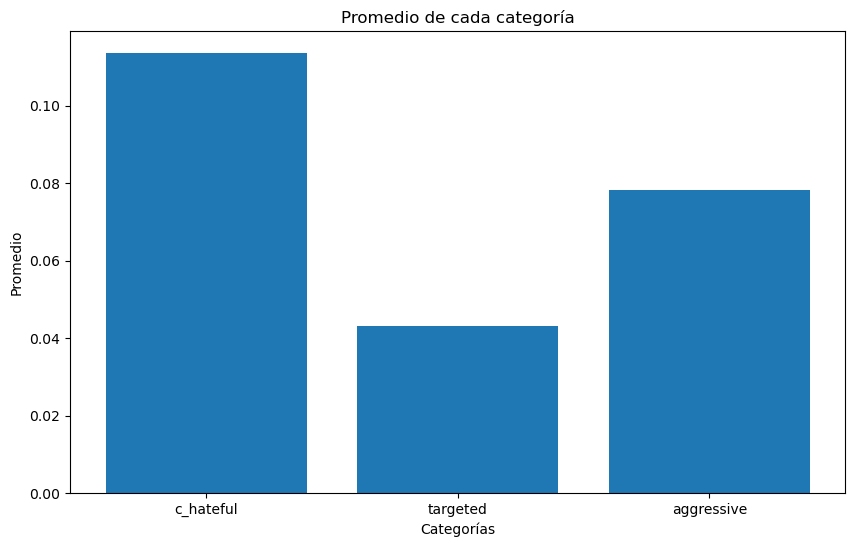

In [34]:
c_hateful = df_neg['c_hateful']
targeted = df_neg['targeted']
aggresive = df_neg['aggresive']

plt.figure(figsize=(10, 6))

plt.bar(['c_hateful', 'targeted', 'aggressive'], [c_hateful.mean(), targeted.mean(), aggresive.mean()])
plt.xlabel('Categorías')
plt.ylabel('Promedio')
plt.title('Promedio de cada categoría')

plt.show()



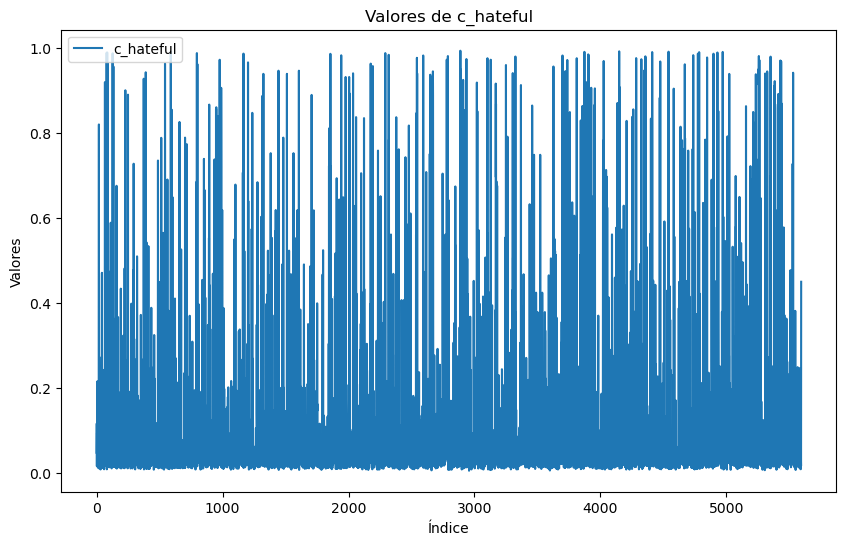

In [35]:
plt.figure(figsize=(10, 6))

plt.plot(df_neg['c_hateful'], label='c_hateful')
# plt.plot(df_neg['targeted'], label='targeted')
# plt.plot(df_neg['aggresive'], label='aggresive')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Valores de c_hateful')
plt.legend()

plt.show()

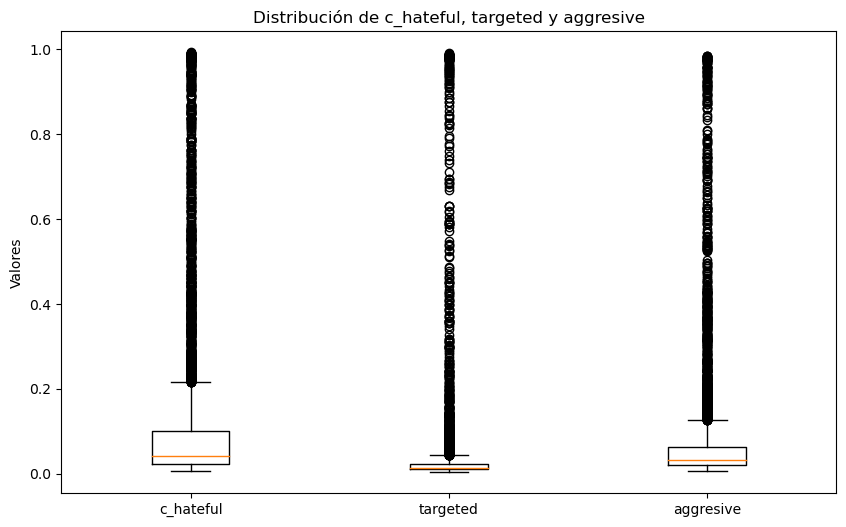

In [36]:
plt.figure(figsize=(10, 6))

plt.boxplot([c_hateful, targeted, aggresive], labels=['c_hateful', 'targeted', 'aggresive'])
plt.ylabel('Valores')
plt.title('Distribución de c_hateful, targeted y aggresive')

plt.show()

In [37]:
df_neg.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_negativos_amnistia_ filtrados.csv')

Filtrar los neutros 

In [63]:
df = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_amnistia_sentimiento.csv')

In [64]:
# Filtrar las filas donde 'sentiment' es igual a 0 =neutro
df_neutro = df[df['sentiment'] == 0]

# Seleccionar las columnas específicas que quieres conservar en el nuevo dataset
columnas_deseadas = ['video_id', 'author', 'comment', 'vectores_tfidf', 'comment_stem', 'sentiment']
df_neutro = df_neutro[columnas_deseadas].copy()

df_neutro.head()

,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,T-smnnEAdM0,UCTlJjNviHj7Y32eiOdHH_FQ,No me creo que les importemos algo. Estos son ...,[0. 0. 0. ... 0. 0. 0.],creo importemo misma opini,0.0
5,T-smnnEAdM0,UC5VOjXoHeqZUF0swDWq_2SA,"como propuso Vox al PP, manipular no es bueno",[0. 0. 0. ... 0. 0. 0.],propuso manipular bueno,0.0
7,T-smnnEAdM0,UCB6JDzYw_B3Ufx_hr11CKag,BABEO ELLOS SON COMPLICES DE ESTE INS ULTO,[0. 0. 0. ... 0. 0. 0.],babeo complic ulto,0.0
9,T-smnnEAdM0,UCdElnB35gVnYe-PWgpCba0w,"La UE es mentira solo esta para rumania, Hungr...",[0. 0. 0. ... 0. 0. 0.],mentira solo rumania hungr,0.0
10,T-smnnEAdM0,UCV2FlYRrK8tAE5OWy3EE1ew,He sido un actor extraordinario haciendo creer...,[0. 0. 0. ... 0. 0. 0.],sido actor extraordinario haciendo creer hacie...,0.0


In [65]:
df_neutro.to_csv('/Users/usuario/Downloads/irunela/csv/csv_neutro/comentarios_amnistia_neutro.csv')

In [66]:
df_neutro = pd.read_csv('/Users/usuario/Downloads/irunela/csv/csv_neutro/comentarios_amnistia_neutro.csv')
df_neutro

,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,0,T-smnnEAdM0,UCTlJjNviHj7Y32eiOdHH_FQ,No me creo que les importemos algo. Estos son ...,[0. 0. 0. ... 0. 0. 0.],creo importemo misma opini,0.0
1,5,T-smnnEAdM0,UC5VOjXoHeqZUF0swDWq_2SA,"como propuso Vox al PP, manipular no es bueno",[0. 0. 0. ... 0. 0. 0.],propuso manipular bueno,0.0
2,7,T-smnnEAdM0,UCB6JDzYw_B3Ufx_hr11CKag,BABEO ELLOS SON COMPLICES DE ESTE INS ULTO,[0. 0. 0. ... 0. 0. 0.],babeo complic ulto,0.0
3,9,T-smnnEAdM0,UCdElnB35gVnYe-PWgpCba0w,"La UE es mentira solo esta para rumania, Hungr...",[0. 0. 0. ... 0. 0. 0.],mentira solo rumania hungr,0.0
4,10,T-smnnEAdM0,UCV2FlYRrK8tAE5OWy3EE1ew,He sido un actor extraordinario haciendo creer...,[0. 0. 0. ... 0. 0. 0.],sido actor extraordinario haciendo creer hacie...,0.0
...,...,...,...,...,...,...,...
5194,11893,UCypRjGGvik,UCfsoHtjdRM2XGqRTshaQvVQ,LO DEL FELÓN NO LO EXPLICA NI LA PSIQUIATRÍA M...,[0. 0. 0. ... 0. 0. 0.],explica psiquiatr avanzada,0.0
5195,11896,UCypRjGGvik,UCCZRP-4c8Pnf5sj6OOOTRGw,0:27: 🎙️ Discusión sobre el conflicto de Israe...,[0. 0. 0. ... 0. 0. 0.],discusi conflicto israel pedro nchez tica haci...,0.0
5196,11897,UCypRjGGvik,UCatFt3SCazklqSzPSE94Z1w,Bermejo es patético comparando a Sánchez con ...,[0. 0. 0. ... 0. 0. 0.],bermejo tico comparando nchez bermejo cambia c...,0.0
5197,11898,UCypRjGGvik,UC6kFF3qoemcmubLKOdynJAw,Ahí aparecen otra vez.... Qué plaga!😝😝😝😝😝😝😝😝😝,[0. 0. 0. ... 0. 0. 0.],aparecen plaga,0.0


In [67]:
df_neutro['hateful'] = df_neutro['comment_stem'].apply(lambda x: hateful(x))

In [16]:
df_neutro['targeted'] = df_neutro['comment_stem'].apply(lambda x: targeted(x))

In [26]:
df_neutro['aggresive'] = df_neutro['comment_stem'].apply(lambda x: aggresive(x))

In [42]:
df_neutro.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'video_id', 'author',
       'comment', 'comment_stem', 'vectores_tfidf', 'sentiment'],
      dtype='object')

In [29]:
#defino los valores de mas de 0.5 en hateful 
hateful_mayor_05 = df_neutro[df_neutro['hateful'] > 0.5]

In [31]:
len(hateful_mayor_05)

106

In [33]:
# Concatenar los DataFrames df_neutro y hateful_mayor_05
df_hate_amnistia = pd.concat([df_neutro, hateful_mayor_05], ignore_index=True)


In [89]:
df_hate_amnistia = df_hate_amnistia.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)


In [91]:
df_hate_amnistia.to_csv('/Users/usuario/Downloads/irunela/csv/csv_hate/hate_amnistia.csv')

In [73]:
df_hate_amnistia.shape

(5305, 11)

In [75]:
df_hate_amnistia = pd.read_csv('/Users/usuario/Downloads/irunela/csv/csv_hate/hate_amnistia.csv')

In [79]:
df_hate_amnistia

,Unnamed: 0.1,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment,hateful,targeted,aggresive
0,0,0,T-smnnEAdM0,UCTlJjNviHj7Y32eiOdHH_FQ,No me creo que les importemos algo. Estos son ...,[0. 0. 0. ... 0. 0. 0.],creo importemo misma opini,0.0,0.033165,0.019271,0.018086
1,1,5,T-smnnEAdM0,UC5VOjXoHeqZUF0swDWq_2SA,"como propuso Vox al PP, manipular no es bueno",[0. 0. 0. ... 0. 0. 0.],propuso manipular bueno,0.0,0.049899,0.040622,0.040734
2,2,7,T-smnnEAdM0,UCB6JDzYw_B3Ufx_hr11CKag,BABEO ELLOS SON COMPLICES DE ESTE INS ULTO,[0. 0. 0. ... 0. 0. 0.],babeo complic ulto,0.0,0.025255,0.020562,0.021216
3,3,9,T-smnnEAdM0,UCdElnB35gVnYe-PWgpCba0w,"La UE es mentira solo esta para rumania, Hungr...",[0. 0. 0. ... 0. 0. 0.],mentira solo rumania hungr,0.0,0.075883,0.010385,0.028004
4,4,10,T-smnnEAdM0,UCV2FlYRrK8tAE5OWy3EE1ew,He sido un actor extraordinario haciendo creer...,[0. 0. 0. ... 0. 0. 0.],sido actor extraordinario haciendo creer hacie...,0.0,0.025055,0.010280,0.014328
...,...,...,...,...,...,...,...,...,...,...,...
5300,5300,11358,U6SkhwV77Kc,UCcjyRLOMybIKAEmbZHbiDQw,Primero nos dicen que hay hasta 50 países util...,[0. 0. 0. ... 0. 0. 0.],primero dicen utilizando diferent sembrar nube...,0.0,0.609890,0.030387,0.389202
5301,5301,11521,A2oo8K7vW9s,UCGSnhdpDi3BKmF5rfle6vxQ,Thais villa. Reaccionaria.,[0. 0. 0. ... 0. 0. 0.],thai villa reaccionaria,0.0,0.899912,0.846265,0.724349
5302,5302,11556,XiEG1X90Ysc,UCtQF38u9lgopVbs6YBNlSzA,"""doña Leticia"" es una izquierdosa resentida q ...",[0. 0. 0. ... 0. 0. 0.],leticia izquierdosa resentida disfruta buena v...,0.0,0.985534,0.984507,0.974576
5303,5303,11607,hSV1xJO7ggA,UClEJaVqLRimiVyMpiilZN6w,La política europea está a la altura de lo que...,[0. 0. 0. ... 0. 0. 0.],tica europea altura europa decir saber,0.0,0.756010,0.150601,0.359774


Visualización

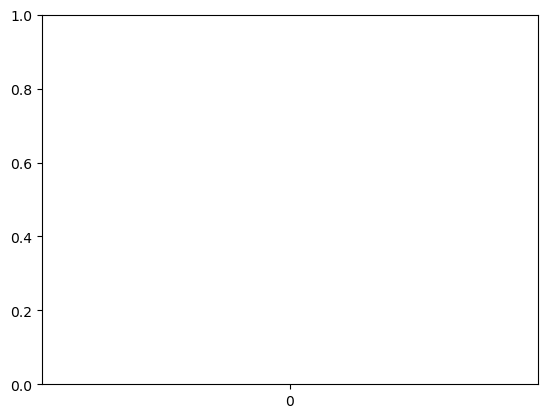

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagrama de caja y bigotes
sns.boxplot(df=df_hate_amnistia[['hateful', 'targeted', 'aggresive']])
plt.show()


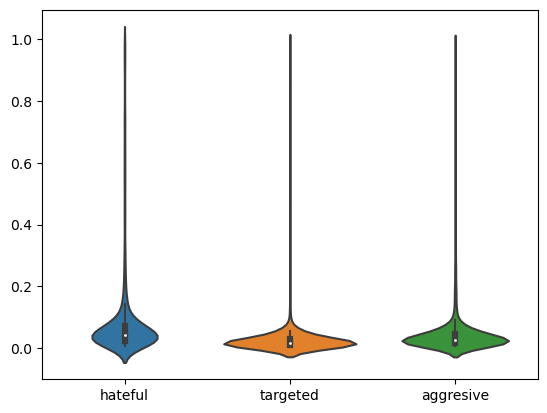

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de violín para comparar tres columnas
sns.violinplot(data=df_hate_amnistia[['hateful', 'targeted', 'aggresive']])
plt.show()
